# Programming Assignment: Бэггинг и случайный лес

**Задание 1.**
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
# Загрузим данные
data = datasets.load_digits()
X, y = data.data, data.target

In [3]:
X, y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [4]:
def write_answer_1(ans):
    with open('ans1.txt', 'w') as fout:
        fout.write(str(ans))

In [5]:
def get_cv_scores(model):
    '''Returns mean cross-validation score of model'''
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1)
    return scores.mean()

In [6]:
tree_1 = DecisionTreeClassifier()
ans_1 = get_cv_scores(tree_1)
print(f'Оценка качества на кросс-валидации для дерева решений со стандартными парметрами: {round(ans_1, 4)}')
write_answer_1(ans_1)

Оценка качества на кросс-валидации для дерева решений со стандартными парметрами: 0.8319


**Задание 2.** Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - ответ в пункте 2. 

In [7]:
def write_answer_2(ans):
    with open('ans2.txt', 'w') as fout:
        fout.write(str(ans))

In [8]:
bag_2 = BaggingClassifier(n_estimators=100)
ans_2 = get_cv_scores(bag_2)
print(f'Оценка качества на кросс-валидации для бэггинга из 100 деревьев: {round(ans_2, 4)}')
write_answer_2(ans_2)

Оценка качества на кросс-валидации для бэггинга из 100 деревьев: 0.9243


**Задание 3.**
Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [9]:
def write_answer_3(ans):
    with open('ans3.txt', 'w') as fout:
        fout.write(str(ans))

In [10]:
bag_3 = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
ans_3 = get_cv_scores(bag_3)
print(f'Оценка качества на кросс-валидации для бэггинга из 100 деревьев и sqrt(d) признаков: {round(ans_3, 4)}')
write_answer_3(ans_3)

Оценка качества на кросс-валидации для бэггинга из 100 деревьев и sqrt(d) признаков: 0.926


**Задание 4.**
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [11]:
def write_answer_4(ans):
    with open('ans4.txt', 'w') as fout:
        fout.write(str(ans))

In [12]:
tree_4 = DecisionTreeClassifier(max_features='sqrt')
bag_4 = BaggingClassifier(base_estimator=tree_4, n_estimators=100)
ans_4 = get_cv_scores(bag_4)
print(f'Оценка качества на кросс-валидации для бэггинга из 100 деревьев и sqrt(d) признаков в каждой вершине: {round(ans_4, 4)}')
write_answer_4(ans_4)

Оценка качества на кросс-валидации для бэггинга из 100 деревьев и sqrt(d) признаков в каждой вершине: 0.9521


**Задание 5.**
Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)



In [13]:
params = {'n_estimators': np.arange(1, 200, 10),
          'max_depth': np.arange(1, 15),
          'max_features': np.arange(1, 60, 5)}

In [14]:
# Зависимость от количества деревьев
scores = []
for n in params['n_estimators']:
    rf = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    scores.append(get_cv_scores(rf))

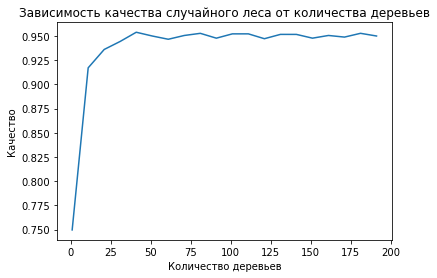

In [15]:
sns.lineplot(x=params['n_estimators'], y=scores)
plt.title('Зависимость качества случайного леса от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('Качество');

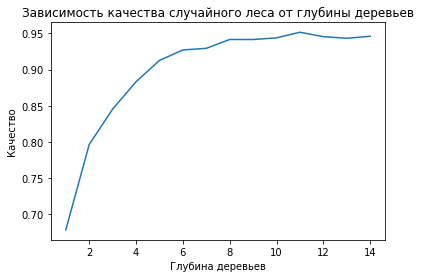

In [16]:
# Зависимость от глубины деревьев
scores = []
for n in params['max_depth']:
    rf = RandomForestClassifier(max_depth=n, n_jobs=-1)
    scores.append(get_cv_scores(rf))

sns.lineplot(x=params['max_depth'], y=scores)
plt.title('Зависимость качества случайного леса от глубины деревьев')
plt.xlabel('Глубина деревьев')
plt.ylabel('Качество');

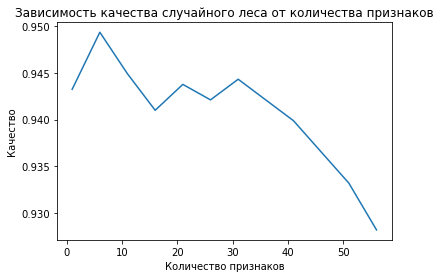

In [17]:
# Зависимость от количества признаков
scores = []
for n in params['max_features']:
    rf = RandomForestClassifier(max_features=n, n_jobs=-1)
    scores.append(get_cv_scores(rf))

sns.lineplot(x=params['max_features'], y=scores)
plt.title('Зависимость качества случайного леса от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('Качество');

In [18]:
def write_answer_5(ans):
    with open('ans_5.txt', 'w') as fout:
        fout.write(' '.join(ans))

In [19]:
ans = ['2', '3', '4', '7']
write_answer_5(ans)

### Верные утверждения

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).